## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
# Write your code here

happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)

happiness

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States
...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa


In [4]:
countries

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"
...,...,...,...,...
130,venezuela,912050,25730435,"93,4"
131,vietnam,329560,84402966,"90,3"
132,yemen,527970,21456188,"50,2"
133,zambia,752614,11502010,"80,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [5]:
# Write your code here

happiness["country"] = happiness["country"].str.lower()

country_features = happiness.merge(countries, left_on=["country"], right_on=["country_name"]).drop(columns=["country_name"])

country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"
...,...,...,...,...,...,...,...,...,...,...,...
130,venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,"93,4"
131,vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,"90,3"
132,yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,"50,2"
133,zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,"80,6"


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [6]:
# Write your code here
happiness.sort_values(["happiness_score"], ascending=False)["country"].head(10)

38         finland
31         denmark
115    switzerland
50         iceland
92          norway
87     netherlands
114         sweden
88     new zealand
6          austria
72      luxembourg
Name: country, dtype: object

We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [7]:
# Write your code here

happiness.groupby(["world_region"]).mean().head(10)

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption
world_region,,,,,,
Central and Eastern Europe,5.891393,0.883027,68.452411,0.780868,-0.139980,0.844670
Commonwealth of Independent States,5.358342,0.856729,64.726558,0.784004,-0.041285,0.746387
East Asia,5.483633,0.873150,68.864882,0.800610,-0.110081,0.757347
Latin America and Caribbean,5.971280,0.853971,66.878195,0.829322,-0.075523,0.795991
Middle East and North Africa,5.269306,0.794934,65.505087,0.714194,-0.079573,0.757591
North America and ANZ,7.173525,0.933842,72.177067,0.907045,0.164180,0.431717
South Asia,4.355083,0.674968,61.090106,0.758113,0.034609,0.785063
Southeast Asia,5.517788,0.829054,65.429071,0.914866,0.112021,0.712395
Sub-Saharan Africa,4.393856,0.694164,55.641572,0.728991,-0.002495,0.765513


The first region has only a few countries! What are them and what is their score?

In [8]:
# Write your code here

happiness[happiness["world_region"] == happiness.loc[0]["world_region"]][["country", "happiness_score"]].head(10)

,country,happiness_score
0,afghanistan,2.5669
9,bangladesh,4.8328
51,india,3.5733
86,nepal,5.1372
93,pakistan,5.6933
112,sri lanka,4.3270


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [9]:
# Write your code here

country_features["literacy"] = pd.to_numeric(country_features["literacy"].apply(lambda x: x.replace(',','.') if type(x) == str else x))

literate_countries = country_features[country_features["literacy"] == 100][["world_region", "country", "happiness_score"]]
for _, row in literate_countries.iterrows():
    print("{0[world_region]} - {0[country]} ({0[happiness_score]})".format(row))

North America and ANZ - australia (7.222799778)
Western Europe - denmark (7.645599842)
Western Europe - finland (7.808700085)
Western Europe - luxembourg (7.237500191)
Western Europe - norway (7.487999916000001)


What is the global average?

In [10]:
# Write your code here

country_features["literacy"].mean()

81.85112781954888

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [11]:
# Write your code here

low_literacy_countries = country_features[country_features["literacy"] < 50]
percentage = len(low_literacy_countries) / len(country_features)
print("{} %".format(round(percentage, 4)*100))

11.85 %


Print the raw number and the percentage of world population that is illiterate.

In [12]:
# Write your code here

world_population = country_features["population"].sum()
illiterate_world_population = (country_features["literacy"] * country_features["population"] / 100).sum()

print("Total world population:",world_population)
print("Illiterate world population:", illiterate_world_population)
print("Percentage of illiterate population in the world:", (illiterate_world_population / world_population) * 100, "%")
# That result seems kinda huge, there may be issues with the data values (or my code) but idk how to check them
# The total world population number suggests that we are missing some big countries or that the data is a bit old

Total world population: 6145475101
Illiterate world population: 4888612110.896999
Percentage of illiterate population in the world: 79.54815584724308 %


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [13]:
# Write your code here

country_features["population_density"] = country_features["population"] / country_features["area"]
country_features["population_density"].head()

0     47.964474
1    124.587971
2     13.826065
3     14.428413
4     99.878255
Name: population_density, dtype: float64

What is the happiness score of the 3 countries with lowest population density?

In [14]:
# Write your code here

country_features.sort_values(["population_density"], ascending=True)[["country", "population_density", "happiness_score"]].head(3)

,country,population_density,happiness_score
83,mongolia,1.810751,5.4562
5,australia,2.636201,7.2228
14,botswana,2.731371,3.4789


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty like expectancy (y).

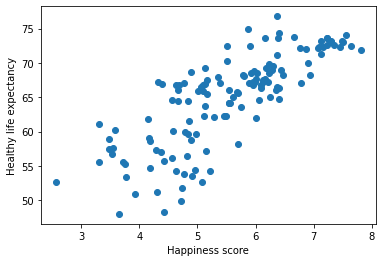

In [15]:
# Write your code here

import matplotlib.pyplot as plt

sorted_data = country_features.sort_values(["happiness_score"], ascending=True)
plt.plot(sorted_data["happiness_score"], sorted_data["healthy_life_expectancy"], "o")
plt.xlabel("Happiness score")
plt.ylabel("Healthy life expectancy")
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.